In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

In [2]:
car_rental_data = pd.read_csv("../Data/car_2018 2019.csv")

In [3]:
car_rental_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27633 entries, 0 to 27632
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          27633 non-null  int64  
 1   AVG_BEFORE_DAYS     27633 non-null  float64
 2   AVG_FARE            27633 non-null  float64
 3   CHANGE PERCENT      27633 non-null  float64
 4   COLLECT_DATE        27633 non-null  object 
 5   HOLIDAY             27633 non-null  int64  
 6   HOLIDAY AFTER       27633 non-null  int64  
 7   HOLIDAY BEFORE      27633 non-null  int64  
 8   LOR                 27633 non-null  int64  
 9   MAX_FARE            27633 non-null  float64
 10  MEDIAN_FARE         27633 non-null  float64
 11  MIN_FARE            27633 non-null  float64
 12  OUTSIPP             27633 non-null  object 
 13  PICKUP_DATE         27633 non-null  object 
 14  TIME BEFORE RENTAL  27633 non-null  int64  
 15  WEEKEND             27633 non-null  int64  
 16  CHAN

In [4]:
# Coverting column types and dropping the right columns
car_rental_data["COLLECT_DATE"] = pd.to_datetime(car_rental_data["COLLECT_DATE"], format='%Y-%m-%d')
car_rental_data["PICKUP_DATE"] = pd.to_datetime(car_rental_data["PICKUP_DATE"], format='%Y-%m-%d')
car_rental_data.drop(columns = "Unnamed: 0", inplace = True)

# Sorting by pickup date
car_rental_data.sort_values(by = "PICKUP_DATE", inplace=True)

In [5]:
car_rental_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27633 entries, 0 to 10567
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   AVG_BEFORE_DAYS     27633 non-null  float64       
 1   AVG_FARE            27633 non-null  float64       
 2   CHANGE PERCENT      27633 non-null  float64       
 3   COLLECT_DATE        27633 non-null  datetime64[ns]
 4   HOLIDAY             27633 non-null  int64         
 5   HOLIDAY AFTER       27633 non-null  int64         
 6   HOLIDAY BEFORE      27633 non-null  int64         
 7   LOR                 27633 non-null  int64         
 8   MAX_FARE            27633 non-null  float64       
 9   MEDIAN_FARE         27633 non-null  float64       
 10  MIN_FARE            27633 non-null  float64       
 11  OUTSIPP             27633 non-null  object        
 12  PICKUP_DATE         27633 non-null  datetime64[ns]
 13  TIME BEFORE RENTAL  27633 non-null  int64     

In [6]:
car_rental_data.head()

AVG_BEFORE_DAYS  AVG_FARE  CHANGE PERCENT COLLECT_DATE  HOLIDAY  \
0               43.655     41.51       -0.046834   2018-01-01        0   
21978           33.960     33.71       -0.007308   2018-01-01        0   
22019           33.630     33.45       -0.005324   2018-01-01        0   
7748            91.080     85.87       -0.054107   2018-01-01        0   
22060           38.385     38.31       -0.001950   2018-01-01        0   

       HOLIDAY AFTER  HOLIDAY BEFORE  LOR  MAX_FARE  MEDIAN_FARE   MIN_FARE  \
0                  0               0    7  107.6100    26.603125  18.355556   
21978              0               0    5   61.2550    31.960750  19.011250   
22019              0               0    5   61.2150    31.902875  18.973750   
7748               0               0    7  196.4925    70.552083  37.237778   
22060              0               0    5   63.9250    39.107750  21.138750   

      OUTSIPP PICKUP_DATE  TIME BEFORE RENTAL  WEEKEND     CHANGE  
0        CCAR  2018-01-31                  30        0   Decrease  
21978    CDAR  2018-01-31                  30        0   Decrease  
22019    EDAR  2018-01-31                  30        0   Decrease  
7748     LCAR  2018-01-31                  30        0   Decrease  
22060    FDAR  2018-01-31                  30        0  No change

*****
Reduce outsipp to 5 logical categories

In [7]:
temp1 = car_rental_data.loc[:,["OUTSIPP" , "AVG_FARE"]].groupby("OUTSIPP")["AVG_FARE"].mean()
temp1[:5]

OUTSIPP
CCAR     63.689617
CDAR     59.771463
CFAR     70.709957
CTAR    122.003715
ECAR     63.491191
Name: AVG_FARE, dtype: float64

In [8]:
temp1.describe()

count     59.000000
mean     108.767105
std       80.779448
min       49.092145
25%       67.115521
50%       85.943560
75%      120.135808
max      509.005000
Name: AVG_FARE, dtype: float64

In [9]:
plt.figure(figsize=(15,7))
plt.plot(temp1.sort_values())
plt.xticks(rotation = 90)
plt.show()

In [10]:
abc = temp1.sort_values()[-5:]
abc

OUTSIPP
PVAR    168.205871
WXAR    169.894491
GYMR    275.759333
PYMR    455.506875
EYMR    509.005000
Name: AVG_FARE, dtype: float64

In [11]:
temp1 = temp1.drop( abc.index.to_list() , axis = 0)

In [12]:
# premium > luxury > midrange> economy > basic

ref1 = pd.qcut(temp1 , 4 , labels = [ "basic" , "economy" , "midrange" , "luxury"])
ref1 = ref1.append(pd.Series( data = ["premium","premium","premium"] , index =["GYMR" , "PYMR" , "EYMR"]))
ref1[:5]

CCAR      basic
CDAR      basic
CFAR    economy
CTAR     luxury
ECAR      basic
dtype: object

*****
Second scheme

In [13]:
temp2 = car_rental_data.loc[:,["OUTSIPP" , "AVG_FARE"]].groupby("OUTSIPP")["AVG_FARE"].mean()
ref = temp2.sort_values().reset_index()
ref2 = pd.Series( data = ref.index/sum(ref.index) , index=ref["OUTSIPP"])
ref2[:5]

OUTSIPP
XXAR    0.000000
ICAH    0.000584
EDAR    0.001169
CDAR    0.001753
IDAR    0.002338
dtype: float64

In [14]:
#Choose ref1 or ref2
ref = ref1

In [15]:
car_rental_data["new_OUTSIPP"] = ref[car_rental_data["OUTSIPP"]].to_list()

In [16]:
orig_car_rental_data = car_rental_data[:]

In [17]:
car_rental_data = car_rental_data.drop(columns = "OUTSIPP")
car_rental_data.columns

Index(['AVG_BEFORE_DAYS', 'AVG_FARE', 'CHANGE PERCENT', 'COLLECT_DATE',
       'HOLIDAY', 'HOLIDAY AFTER', 'HOLIDAY BEFORE', 'LOR', 'MAX_FARE',
       'MEDIAN_FARE', 'MIN_FARE', 'PICKUP_DATE', 'TIME BEFORE RENTAL',
       'WEEKEND', 'CHANGE', 'new_OUTSIPP'],
      dtype='object')

In [18]:
car_rental_data.head()

AVG_BEFORE_DAYS  AVG_FARE  CHANGE PERCENT COLLECT_DATE  HOLIDAY  \
0               43.655     41.51       -0.046834   2018-01-01        0   
21978           33.960     33.71       -0.007308   2018-01-01        0   
22019           33.630     33.45       -0.005324   2018-01-01        0   
7748            91.080     85.87       -0.054107   2018-01-01        0   
22060           38.385     38.31       -0.001950   2018-01-01        0   

       HOLIDAY AFTER  HOLIDAY BEFORE  LOR  MAX_FARE  MEDIAN_FARE   MIN_FARE  \
0                  0               0    7  107.6100    26.603125  18.355556   
21978              0               0    5   61.2550    31.960750  19.011250   
22019              0               0    5   61.2150    31.902875  18.973750   
7748               0               0    7  196.4925    70.552083  37.237778   
22060              0               0    5   63.9250    39.107750  21.138750   

      PICKUP_DATE  TIME BEFORE RENTAL  WEEKEND     CHANGE new_OUTSIPP  
0      2018-01-31                  30        0   Decrease       basic  
21978  2018-01-31                  30        0   Decrease       basic  
22019  2018-01-31                  30        0   Decrease       basic  
7748   2018-01-31                  30        0   Decrease    midrange  
22060  2018-01-31                  30        0  No change       basic

In [19]:
car_rental_data[car_rental_data.isnull()]

AVG_BEFORE_DAYS  AVG_FARE  CHANGE PERCENT COLLECT_DATE  HOLIDAY  \
0                  NaN       NaN             NaN          NaT      NaN   
21978              NaN       NaN             NaN          NaT      NaN   
22019              NaN       NaN             NaN          NaT      NaN   
7748               NaN       NaN             NaN          NaT      NaN   
22060              NaN       NaN             NaN          NaT      NaN   
...                ...       ...             ...          ...      ...   
4229               NaN       NaN             NaN          NaT      NaN   
27387              NaN       NaN             NaN          NaT      NaN   
23273              NaN       NaN             NaN          NaT      NaN   
25584              NaN       NaN             NaN          NaT      NaN   
10567              NaN       NaN             NaN          NaT      NaN   

       HOLIDAY AFTER  HOLIDAY BEFORE  LOR  MAX_FARE  MEDIAN_FARE  MIN_FARE  \
0                NaN             NaN  NaN       NaN          NaN       NaN   
21978            NaN             NaN  NaN       NaN          NaN       NaN   
22019            NaN             NaN  NaN       NaN          NaN       NaN   
7748             NaN             NaN  NaN       NaN          NaN       NaN   
22060            NaN             NaN  NaN       NaN          NaN       NaN   
...              ...             ...  ...       ...          ...       ...   
4229             NaN             NaN  NaN       NaN          NaN       NaN   
27387            NaN             NaN  NaN       NaN          NaN       NaN   
23273            NaN             NaN  NaN       NaN          NaN       NaN   
25584            NaN             NaN  NaN       NaN          NaN       NaN   
10567            NaN             NaN  NaN       NaN          NaN       NaN   

      PICKUP_DATE  TIME BEFORE RENTAL  WEEKEND CHANGE new_OUTSIPP  
0             NaT                 NaN      NaN    NaN         NaN  
21978         NaT                 NaN      NaN    NaN         NaN  
22019         NaT                 NaN      NaN    NaN         NaN  
7748          NaT                 NaN      NaN    NaN         NaN  
22060         NaT                 NaN      NaN    NaN         NaN  
...           ...                 ...      ...    ...         ...  
4229          NaT                 NaN      NaN    NaN         NaN  
27387         NaT                 NaN      NaN    NaN         NaN  
23273         NaT                 NaN      NaN    NaN         NaN  
25584         NaT                 NaN      NaN    NaN         NaN  
10567         NaT                 NaN      NaN    NaN         NaN  

[27633 rows x 16 columns]

In [20]:
car_rental_data.isnull().sum()

AVG_BEFORE_DAYS          0
AVG_FARE                 0
CHANGE PERCENT           0
COLLECT_DATE             0
HOLIDAY                  0
HOLIDAY AFTER            0
HOLIDAY BEFORE           0
LOR                      0
MAX_FARE                 0
MEDIAN_FARE              0
MIN_FARE                 0
PICKUP_DATE              0
TIME BEFORE RENTAL       0
WEEKEND                  0
CHANGE                   0
new_OUTSIPP           1127
dtype: int64

In [21]:
car_rental_data.dropna(inplace=True)

In [22]:
print("Min: " , min(car_rental_data["PICKUP_DATE"]), "\nMax: ", max(car_rental_data["PICKUP_DATE"]))

Min:  2018-01-31 00:00:00 
Max:  2020-01-29 00:00:00


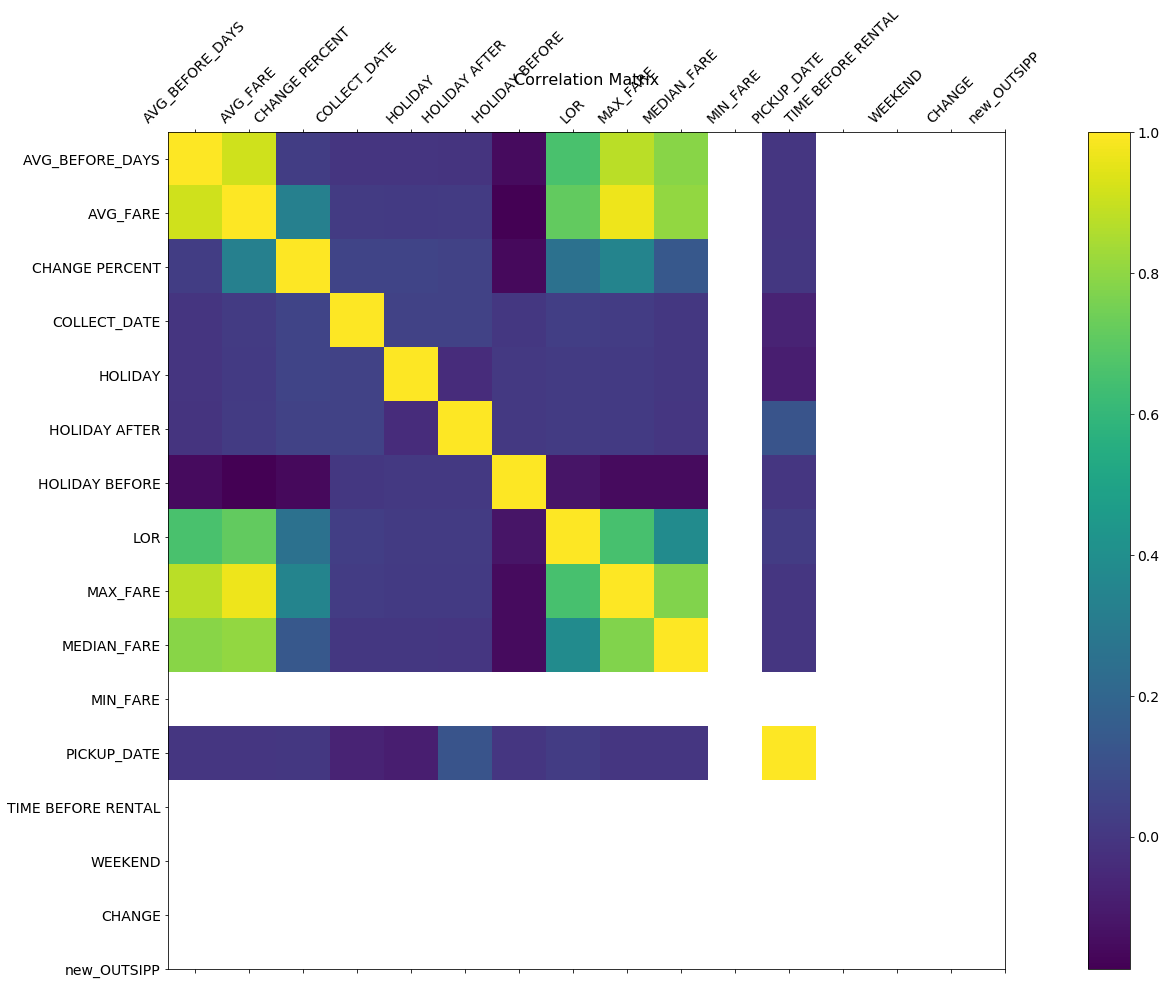

In [23]:
# Checking for correlations
f = plt.figure(figsize=(30, 15))
plt.matshow(car_rental_data.corr(), fignum=f.number)
plt.xticks(range(car_rental_data.shape[1]), car_rental_data.columns, fontsize=14, rotation=45)
plt.yticks(range(car_rental_data.shape[1]), car_rental_data.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

### are we dropping any columns based on corr? Why is NaN

In [24]:
corr = car_rental_data.corr()
corr.style.background_gradient(cmap='coolwarm')

/Users/raghavsood/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/Users/raghavsood/anaconda3/lib/python3.7/site-packages/pandas/io/formats/style.py:1089: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
/Users/raghavsood/anaconda3/lib/python3.7/site-packages/pandas/io/formats/style.py:1090: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


# Extracting, converting the features

In [25]:
# Extracting year, month and date from pickup date
car_rental_data["PICKUP_DATE_YEAR"] = pd.DatetimeIndex(car_rental_data["PICKUP_DATE"]).year
car_rental_data["PICKUP_DATE_MONTH"] = pd.DatetimeIndex(car_rental_data["PICKUP_DATE"]).month
car_rental_data["PICKUP_DATE_DATE"] = pd.DatetimeIndex(car_rental_data["PICKUP_DATE"]).day

In [26]:
# converting car_type to one-hot encoded format
car_rental_data = pd.get_dummies(car_rental_data, columns = ["new_OUTSIPP"] , prefix = "OUTSIPP", drop_first=True)

In [27]:
car_rental_data.head()

AVG_BEFORE_DAYS  AVG_FARE  CHANGE PERCENT COLLECT_DATE  HOLIDAY  \
0               43.655     41.51       -0.046834   2018-01-01        0   
21978           33.960     33.71       -0.007308   2018-01-01        0   
22019           33.630     33.45       -0.005324   2018-01-01        0   
7748            91.080     85.87       -0.054107   2018-01-01        0   
22060           38.385     38.31       -0.001950   2018-01-01        0   

       HOLIDAY AFTER  HOLIDAY BEFORE  LOR  MAX_FARE  MEDIAN_FARE  ...  \
0                  0               0    7  107.6100    26.603125  ...   
21978              0               0    5   61.2550    31.960750  ...   
22019              0               0    5   61.2150    31.902875  ...   
7748               0               0    7  196.4925    70.552083  ...   
22060              0               0    5   63.9250    39.107750  ...   

       TIME BEFORE RENTAL WEEKEND     CHANGE  PICKUP_DATE_YEAR  \
0                      30       0   Decrease              2018   
21978                  30       0   Decrease              2018   
22019                  30       0   Decrease              2018   
7748                   30       0   Decrease              2018   
22060                  30       0  No change              2018   

      PICKUP_DATE_MONTH  PICKUP_DATE_DATE  OUTSIPP_economy  OUTSIPP_luxury  \
0                     1                31                0               0   
21978                 1                31                0               0   
22019                 1                31                0               0   
7748                  1                31                0               0   
22060                 1                31                0               0   

       OUTSIPP_midrange  OUTSIPP_premium  
0                     0                0  
21978                 0                0  
22019                 0                0  
7748                  1                0  
22060                 0                0  

[5 rows x 22 columns]

In [28]:
car_rental_data.columns

Index(['AVG_BEFORE_DAYS', 'AVG_FARE', 'CHANGE PERCENT', 'COLLECT_DATE',
       'HOLIDAY', 'HOLIDAY AFTER', 'HOLIDAY BEFORE', 'LOR', 'MAX_FARE',
       'MEDIAN_FARE', 'MIN_FARE', 'PICKUP_DATE', 'TIME BEFORE RENTAL',
       'WEEKEND', 'CHANGE', 'PICKUP_DATE_YEAR', 'PICKUP_DATE_MONTH',
       'PICKUP_DATE_DATE', 'OUTSIPP_economy', 'OUTSIPP_luxury',
       'OUTSIPP_midrange', 'OUTSIPP_premium'],
      dtype='object')

In [29]:
# Filtering features and creating a copy
classification_drop_features = ["AVG_FARE","COLLECT_DATE","LOR", 'MAX_FARE', 'MEDIAN_FARE',
       'MIN_FARE', 'PICKUP_DATE', 'TIME BEFORE RENTAL', "CHANGE PERCENT"]
classification_data = car_rental_data.copy()
classification_data.drop(columns = classification_drop_features, inplace=True)

In [30]:
classification_data.head()

AVG_BEFORE_DAYS  HOLIDAY  HOLIDAY AFTER  HOLIDAY BEFORE  WEEKEND  \
0               43.655        0              0               0        0   
21978           33.960        0              0               0        0   
22019           33.630        0              0               0        0   
7748            91.080        0              0               0        0   
22060           38.385        0              0               0        0   

          CHANGE  PICKUP_DATE_YEAR  PICKUP_DATE_MONTH  PICKUP_DATE_DATE  \
0       Decrease              2018                  1                31   
21978   Decrease              2018                  1                31   
22019   Decrease              2018                  1                31   
7748    Decrease              2018                  1                31   
22060  No change              2018                  1                31   

       OUTSIPP_economy  OUTSIPP_luxury  OUTSIPP_midrange  OUTSIPP_premium  
0                    0               0                 0                0  
21978                0               0                 0                0  
22019                0               0                 0                0  
7748                 0               0                 1                0  
22060                0               0                 0                0

## Scaling data

In [31]:
classification_data.columns

Index(['AVG_BEFORE_DAYS', 'HOLIDAY', 'HOLIDAY AFTER', 'HOLIDAY BEFORE',
       'WEEKEND', 'CHANGE', 'PICKUP_DATE_YEAR', 'PICKUP_DATE_MONTH',
       'PICKUP_DATE_DATE', 'OUTSIPP_economy', 'OUTSIPP_luxury',
       'OUTSIPP_midrange', 'OUTSIPP_premium'],
      dtype='object')

In [32]:
# classification_data[["AVG_BEFORE_DAYS", "CHANGE PERCENT"]].head(20)
classification_data[["AVG_BEFORE_DAYS"]].head(20)

AVG_BEFORE_DAYS
0               43.655
21978           33.960
22019           33.630
7748            91.080
22060           38.385
22101           36.450
22142           98.760
22183           38.665
7043            66.900
6338            45.075
5635           121.120
4935            79.345
4230           104.075
3525            98.500
2820            46.135
2115            46.460
8453           133.460
1410            43.570
21274           23.060
9863            74.560

In [33]:
# Scaling AVG_BEFORE_DAYS and CHANGE PERCENT
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# classification_data[["AVG_BEFORE_DAYS", "CHANGE PERCENT"]] = scaler.fit_transform(classification_data[["AVG_BEFORE_DAYS", "CHANGE PERCENT"]])
classification_data[["AVG_BEFORE_DAYS"]] = scaler.fit_transform(classification_data[["AVG_BEFORE_DAYS"]])

In [34]:
# classification_data[["AVG_BEFORE_DAYS", "CHANGE PERCENT"]].head(20)
classification_data[["AVG_BEFORE_DAYS"]].head(20)

AVG_BEFORE_DAYS
0            -1.220856
21978        -1.472890
22019        -1.481469
7748          0.012021
22060        -1.357856
22101        -1.408159
22142         0.211673
22183        -1.350577
7043         -0.616570
6338         -1.183941
5635          0.792952
4935         -0.293046
4230          0.349844
3525          0.204914
2820         -1.156385
2115         -1.147936
8453          1.113747
1410         -1.223065
21274        -1.756250
9863         -0.417438

# Machine Learning - Random Forest

In [36]:
# Extracting columns
classification_columns = [x for x in classification_data.columns.to_list() if x != "CHANGE"]
X = classification_data[classification_columns]
y = classification_data["CHANGE"]

In [37]:
X_train = X[:int(X.shape[0]*0.7)]
X_test = X[int(X.shape[0]*0.7):]
y_train = y[:int(X.shape[0]*0.7)]
y_test = y[int(X.shape[0]*0.7):]

In [38]:
# Checking correct sort order for train test splits
print("Min train date:", min(X_train["PICKUP_DATE_YEAR"]*100 + X_train["PICKUP_DATE_MONTH"]))
print("Max train date:", max(X_train["PICKUP_DATE_YEAR"]*100 + X_train["PICKUP_DATE_MONTH"]))

Min train date: 201801
Max train date: 201907


In [39]:
# Importing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, balanced_accuracy_score, make_scorer

In [40]:
# Default model
default = RandomForestClassifier(random_state=1)
default.fit(X_train, y_train)
default_pred = default.predict(X_test)
print("Accuracy for default Random Forest on CV data: ",accuracy_score(y_test,default_pred))
print()
print("Balanced Accuracy for default Random Forest on CV data: ",balanced_accuracy_score(y_test,default_pred))
print()
for x, y in zip(X_train.columns.tolist(), default.feature_importances_):
    print(x,round(y,2))
print()
# print("AUC", roc_auc_score(y_test, default.predict_proba(X_test)[:,1]))

Accuracy for default Random Forest on CV data:  0.414738430583501

Balanced Accuracy for default Random Forest on CV data:  0.42736136752715

AVG_BEFORE_DAYS 0.49
HOLIDAY 0.01
HOLIDAY AFTER 0.01
HOLIDAY BEFORE 0.01
WEEKEND 0.02
PICKUP_DATE_YEAR 0.02
PICKUP_DATE_MONTH 0.2
PICKUP_DATE_DATE 0.22
OUTSIPP_economy 0.01
OUTSIPP_luxury 0.01
OUTSIPP_midrange 0.01
OUTSIPP_premium 0.0



In [42]:
%timeit
rfc = RandomForestClassifier(random_state=1)
# Setting grid parameters
n_estimators = [100, 200, 300, 500, 800]
max_depth = [None, 4, 5, 6, 7, 8, 9, 10]
max_features = ['auto', 'sqrt', 'log2']
# min_samples_split = [2, 5, 10, 15, 100]
# min_samples_leaf = [1, 2, 5, 10]
criterion = ['gini', 'entropy']


parameters = dict(n_estimators = n_estimators, max_depth = max_depth,
#                   min_samples_split = min_samples_split, min_samples_leaf = min_samples_leaf,
                  criterion = criterion, max_features = max_features)

gridF = GridSearchCV(estimator = rfc, param_grid = parameters, cv = 5, verbose = 1, scoring = "balanced_accuracy",
                      n_jobs = -1)
gridF.fit(X_train, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   32.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed: 12.9min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=1,
                                   

In [43]:
# Best parameters
gridF.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 100}

In [44]:
# Reinitializing the best model
best_model = RandomForestClassifier(random_state=1, criterion="gini", max_depth=4, max_features="auto", 
                                   n_estimators=100)
best_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [45]:
pred = best_model.predict(X_test)
print("Accuracy for best Random Forest on CV data: ",accuracy_score(y_test,pred))

Accuracy for best Random Forest on CV data:  0.4978621730382294


In [46]:
print("Balanced Accuracy for default Random Forest on CV data: ",balanced_accuracy_score(y_test,pred))

Balanced Accuracy for default Random Forest on CV data:  0.43731073543230964


In [47]:
# print("AUC", roc_auc_score(y_test, best_model.predict_proba(X_test)[:,1]))

In [48]:
for x, y in zip(X_train.columns.tolist(), best_model.feature_importances_):
    print(x,round(y,2))

AVG_BEFORE_DAYS 0.2
HOLIDAY 0.01
HOLIDAY AFTER 0.01
HOLIDAY BEFORE 0.02
WEEKEND 0.01
PICKUP_DATE_YEAR 0.06
PICKUP_DATE_MONTH 0.47
PICKUP_DATE_DATE 0.14
OUTSIPP_economy 0.04
OUTSIPP_luxury 0.04
OUTSIPP_midrange 0.01
OUTSIPP_premium 0.0


## Extracting the data for classification

In [58]:
classification_data = classification_data.reset_index(drop=True)
classification_data.to_csv("classification_data.csv")